# import required module

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pywt
import tensorflow as tf1
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
from tensorflow import keras
import warnings
from sklearn import decomposition
warnings.filterwarnings('ignore')

Instructions for updating:
non-resource variables are not supported in the long term


# Load data-set

In [2]:

df=pd.read_csv("/content/drive/MyDrive/Dataset/MTP/All_Activity.csv")
df

Time_stamp_sec         1         2         3         4         5  \
0       7.152557e-07  0.012162  0.005372  0.005689  0.006941  0.013136   
1       4.227595e-01  0.019417  0.004365  0.017467  0.012783  0.005486   
2       7.368343e-01  0.002404  0.013390  0.011502  0.010158  0.003352   
3       9.805675e-01  0.010619  0.015050  0.018699  0.000319  0.011122   
4       1.215650e+00  0.006574  0.007201  0.004724  0.001101  0.009369   
...              ...       ...       ...       ...       ...       ...   
2196    3.565157e+02  0.300294  0.166791  0.155930  0.024595  0.063003   
2197    3.572718e+02  0.222309  0.209594  0.209616  0.154318  0.239492   
2198    3.579822e+02  0.138792  0.216504  0.713957  0.384248  0.227561   
2199    3.587376e+02  0.241029  0.181942  0.236581  0.113624  0.205489   
2200    3.594948e+02  0.051880  0.248920  0.195581  0.114890  0.095906   

             6         7         8         9  ...        96        97  \
0     0.013164  0.015125  0.003927  0.011982  ... -1.431029  1.658715   
1     0.005640  0.002650  0.005744  0.002402  ...  2.632000 -2.480699   
2     0.009591  0.002527  0.019817  0.005339  ... -2.106238  2.369294   
3     0.007625  0.011456  0.020549  0.002775  ...  1.775891 -1.555613   
4     0.004236  0.011648  0.011491  0.006268  ... -0.565492  0.493544   
...        ...       ...       ...       ...  ...       ...       ...   
2196  0.073611  0.245571  0.103749  0.054041  ...  1.565846  0.997995   
2197  0.293416  0.129744  0.316540  0.252837  ...  2.341387  2.811029   
2198  0.076942  0.409022  0.030229  0.316751  ... -2.378767 -2.427357   
2199  0.291535  0.390994  0.173994  0.329688  ... -2.383065  0.677491   
2200  0.053559  0.046083  0.056395  0.037836  ...  0.851325  1.056112   

            98        99       100       101       102       103       104  \
0    -2.660998  2.919511  2.608629 -2.768291  0.670073 -3.005982 -0.881872   
1    -2.531461  2.562904 -2.713858 -2.149658 -1.692947 -1.016725  3.072117   
2     1.416724  0.993940  2.527769 -2.504044  1.013208 -2.877881 -3.029874   
3    -2.156544  0.383077  2.957304  1.570796 -2.965438  2.408399  3.080692   
4    -0.448955 -0.214734 -0.395782 -0.261944 -1.993352 -1.846545 -0.208426   
...        ...       ...       ...       ...       ...       ...       ...   
2196  1.061936  1.088682  1.215235  0.899895  0.958297  1.173681  1.123351   
2197  1.826611  0.580882  0.693593  0.236914  0.715073 -2.321794  0.828111   
2198 -2.389044 -2.470082 -2.409881 -2.558775  0.674806  0.868363 -0.782270   
2199  0.826752 -2.245926  2.856896 -0.948657  2.320912  2.331203 -0.846382   
2200  0.955403  0.579894  0.768808  0.839568  1.155797  1.163397  0.827491   

         Activity  
0         Walking  
1         Walking  
2         Walking  
3         Walking  
4         Walking  
...           ...  
2196  No_Activity  
2197  No_Activity  
2198  No_Activity  
2199  No_Activity  
2200  No_Activity  

[2201 rows x 106 columns]

# Visualization of dataset

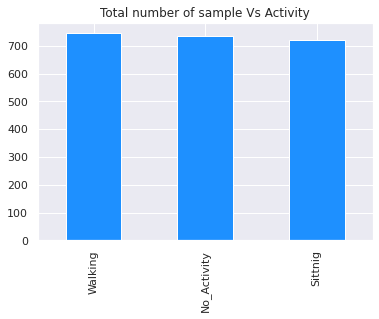

In [3]:
sns.set(color_codes=True)
df['Activity'].value_counts().plot(kind='bar',color="dodgerblue",title='Total number of sample Vs Activity')


## Analysis of Walking activity with Noise reduction using PCA

In [4]:
w_amp=df.iloc[:745,1:53].values
Walking_ts=df.iloc[:745,0]
# w_amp

(745, 3)
(745,)


Text(0, 0.5, 'Amplitudes')

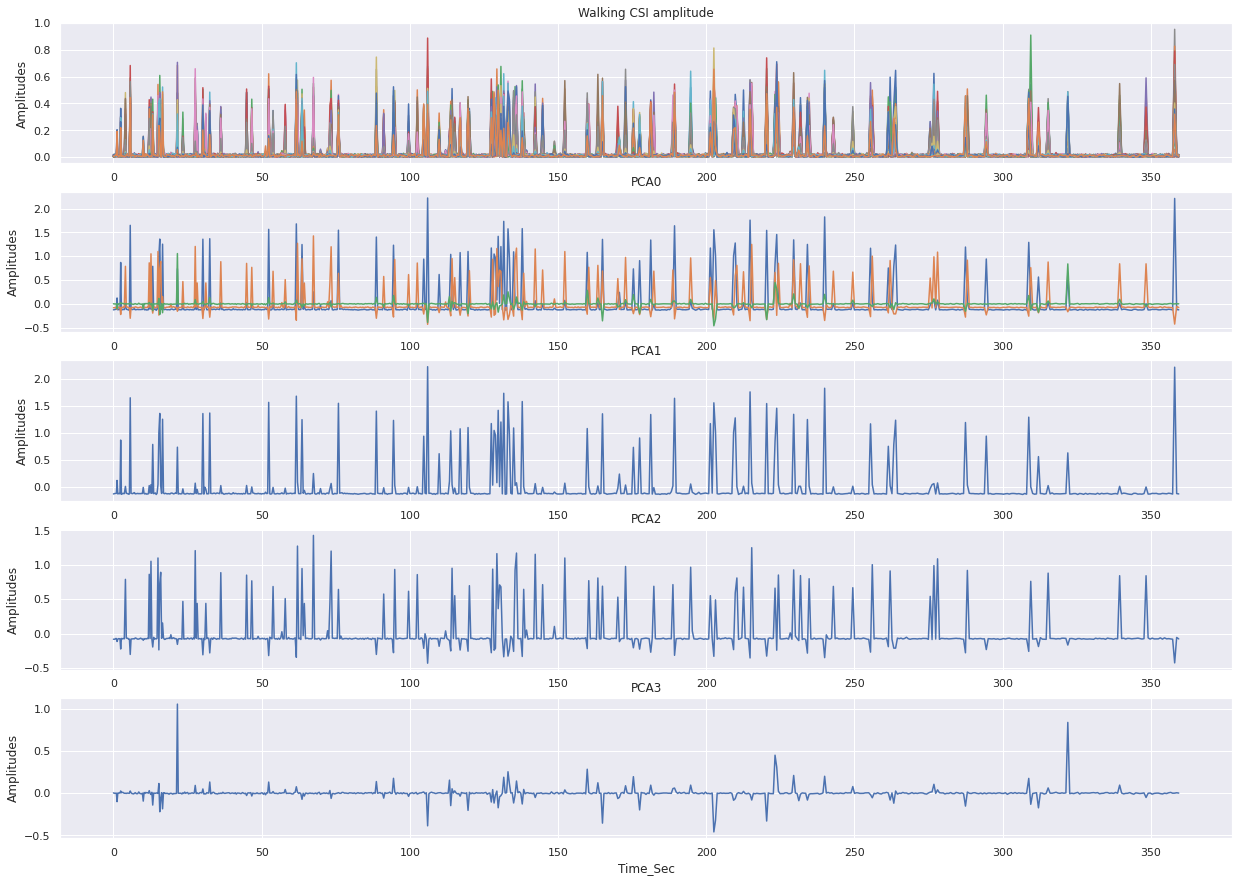

In [5]:
pca = decomposition.PCA(n_components=3)
walking_pca = pca.fit_transform(w_amp)

print(walking_pca.shape)
print(walking_pca.T[0].shape)

fig = plt.figure(figsize = (21, 15))
ax = plt.subplot(511)
plt.plot(Walking_ts,w_amp)
plt.title("Walking CSI amplitude")
plt.ylabel('Amplitudes')

ax1 = plt.subplot(512)
plt.plot(Walking_ts,walking_pca)
ax1.set_title("PCA0")
plt.ylabel('Amplitudes')

ax2 = plt.subplot(513)
plt.plot(Walking_ts, walking_pca.T[0])
ax2.set_title("PCA1")
plt.ylabel('Amplitudes')

ax3 = plt.subplot(514)
plt.plot(Walking_ts, walking_pca.T[1])
ax3.set_title("PCA2")
plt.ylabel('Amplitudes')

ax4 = plt.subplot(515)
plt.plot(Walking_ts, walking_pca.T[2])
ax4.set_title("PCA3")
plt.xlabel('Time_Sec')
plt.ylabel('Amplitudes')
# fig.savefig("Walking_PCA_mag.png")

## Analysis of Sitting activity with Noise reduction using PCA

In [6]:
Sitting_amp=df.iloc[745:1466,1:53].values
Sitting_ts=df.iloc[745:1466,0]
# Sitting_amp

Text(0, 0.5, 'Amplitudes')

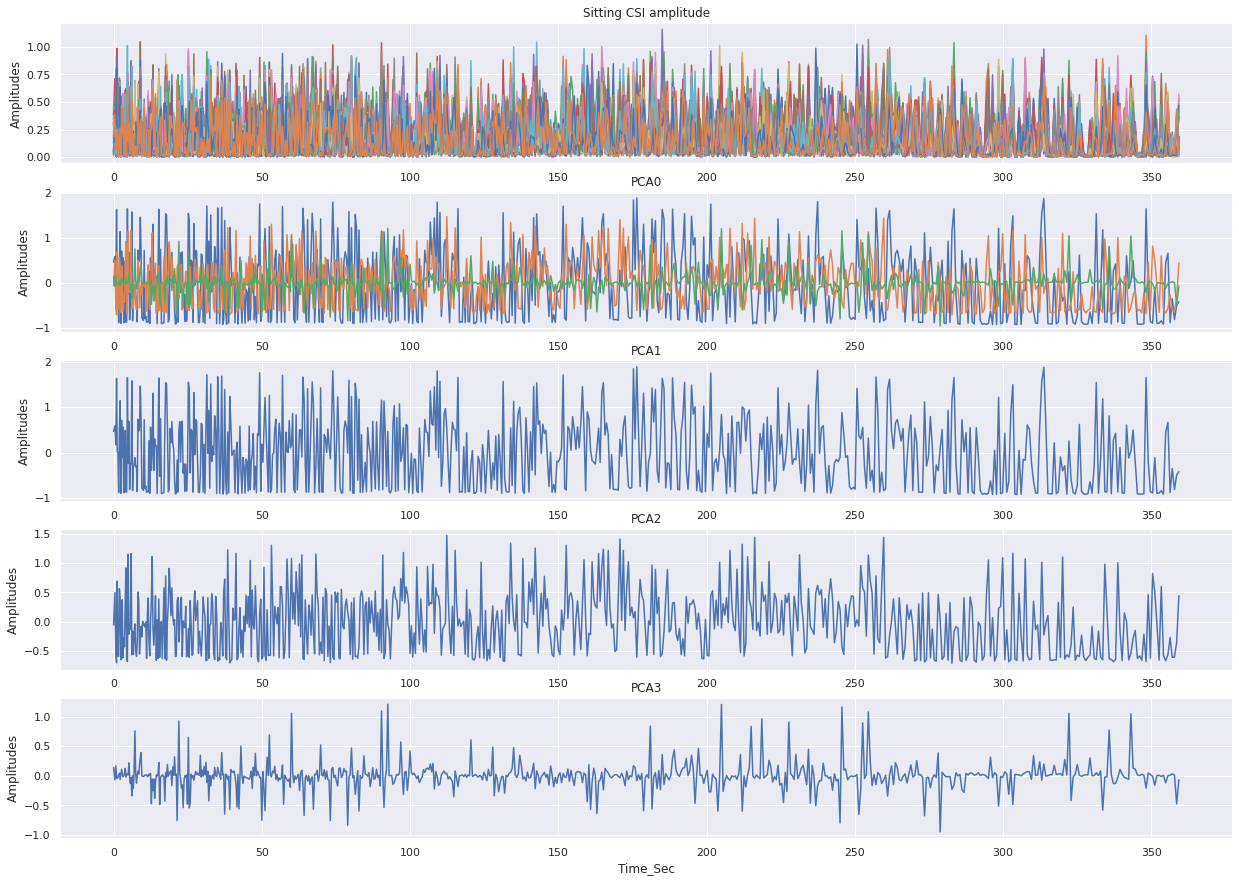

In [7]:
Sitting_pca = pca.fit_transform(Sitting_amp)

fig = plt.figure(figsize = (21, 15))
ax = plt.subplot(511)
plt.plot(Sitting_ts,Sitting_amp)
plt.title("Sitting CSI amplitude")
plt.ylabel('Amplitudes')

ax1 = plt.subplot(512)
plt.plot(Sitting_ts,Sitting_pca)
ax1.set_title("PCA0")
plt.ylabel('Amplitudes')

ax2 = plt.subplot(513)
plt.plot(Sitting_ts, Sitting_pca.T[0])
ax2.set_title("PCA1")
plt.ylabel('Amplitudes')

ax3 = plt.subplot(514)
plt.plot(Sitting_ts, Sitting_pca.T[1])
ax3.set_title("PCA2")
plt.ylabel('Amplitudes')

ax4 = plt.subplot(515)
plt.plot(Sitting_ts, Sitting_pca.T[2])
ax4.set_title("PCA3")
plt.xlabel('Time_Sec')
plt.ylabel('Amplitudes')
# fig.savefig("Sitting_PCA_mag.png")

## Analysis of No_Person activity with Noise reduction using PCA

In [8]:
NP_amp=df.iloc[1466:,1:53].values
NP_ts=df.iloc[1466:,0]
# NP_amp

Text(0, 0.5, 'Amplitudes')

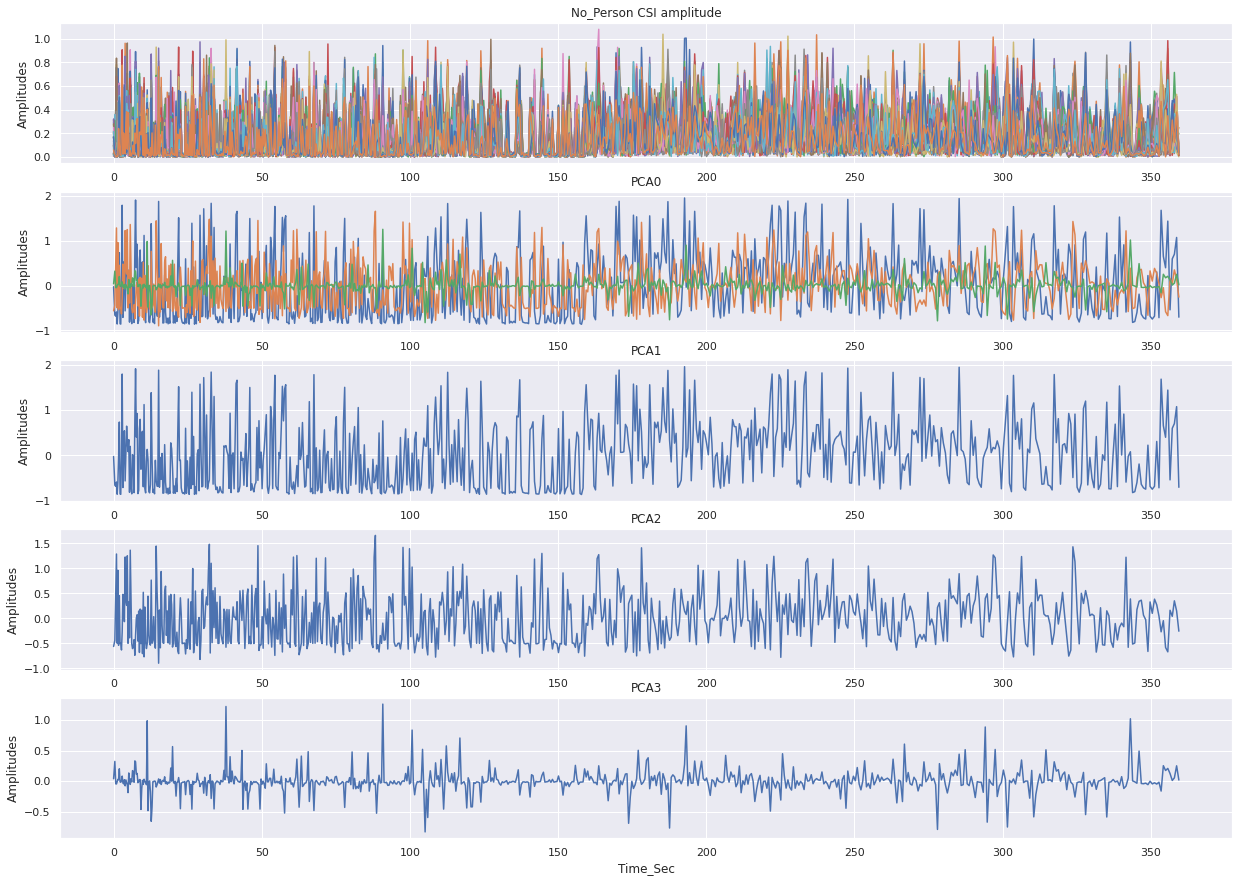

In [9]:
NP_pca = pca.fit_transform(NP_amp)

fig = plt.figure(figsize = (21, 15))
ax = plt.subplot(511)
plt.plot(NP_ts,NP_amp)
plt.title("No_Person CSI amplitude")
plt.ylabel('Amplitudes')

ax1 = plt.subplot(512)
plt.plot(NP_ts,NP_pca)
ax1.set_title("PCA0")
plt.ylabel('Amplitudes')

ax2 = plt.subplot(513)
plt.plot(NP_ts, NP_pca.T[0])
ax2.set_title("PCA1")
plt.ylabel('Amplitudes')

ax3 = plt.subplot(514)
plt.plot(NP_ts, NP_pca.T[1])
ax3.set_title("PCA2")
plt.ylabel('Amplitudes')

ax4 = plt.subplot(515)
plt.plot(NP_ts, NP_pca.T[2])
ax4.set_title("PCA3")
plt.xlabel('Time_Sec')
plt.ylabel('Amplitudes')
# fig.savefig("NP_PCA_mag.png")


## Analysis of All activity

In [10]:
dataset_amp=df.iloc[:,1:53].values
dataset_phs=df.iloc[:,53:-1].values

dataset_labels=df.iloc[:,-1]
Time_stamp=df.iloc[:,0]
# dataset_amp
# dataset_phs
# dataset_labels
# Time_stamp

In [11]:
fig = plt.figure(figsize = (21, 7))
plt.plot(dataset_amp)
plt.title("All CSI amplitude")
plt.xlabel('Time_Sec')
plt.ylabel('Amplitudes')


Text(0, 0.5, 'Amplitudes')

In [12]:
fig = plt.figure(figsize = (21, 7))
im = plt.imshow((dataset_amp).T,interpolation = "nearest", aspect = "auto", cmap="jet", origin='lower')
plt.colorbar()
plt.title("All CSI amplitude Spectrogram")

Text(0.5, 1.0, 'All CSI amplitude Spectrogram')

In [13]:
fig = plt.figure(figsize = (21, 7))
plt.plot(dataset_phs)
plt.title("All CSI Phase")
plt.xlabel('Time_Sec')
plt.ylabel('Amplitudes')

Text(0, 0.5, 'Amplitudes')

# PCA for Dimensionality and Noise redution

## Amplitude Noise reduction using PCA

In [14]:

pca = decomposition.PCA(n_components=3)
amp_pca = pca.fit_transform(dataset_amp)

print(amp_pca.shape)
print(amp_pca.T[0].shape)

fig = plt.figure(figsize = (21, 15))
ax = plt.subplot(511)
plt.plot(dataset_amp)
plt.title("All Activity CSI amplitude, Walking: 0- 744, Sitting:745-1466 , No_Person:1467-2201")
plt.ylabel('Amplitudes')

ax1 = plt.subplot(512)
plt.plot(amp_pca)
ax1.set_title("PCA0")
plt.ylabel('Amplitudes')

ax2 = plt.subplot(513)
plt.plot(amp_pca.T[0])
ax2.set_title("PCA1")
plt.ylabel('Amplitudes')

ax3 = plt.subplot(514)
plt.plot(amp_pca.T[1])
ax3.set_title("PCA2")
plt.ylabel('Amplitudes')

ax4 = plt.subplot(515)
plt.plot(amp_pca.T[2])
ax4.set_title("PCA3")
plt.xlabel('Frames')
plt.ylabel('Amplitudes')
# fig.savefig("All_PCA_mag.png")


(2201, 3)
(2201,)


Text(0, 0.5, 'Amplitudes')

## Phase Noise reduction using PCA

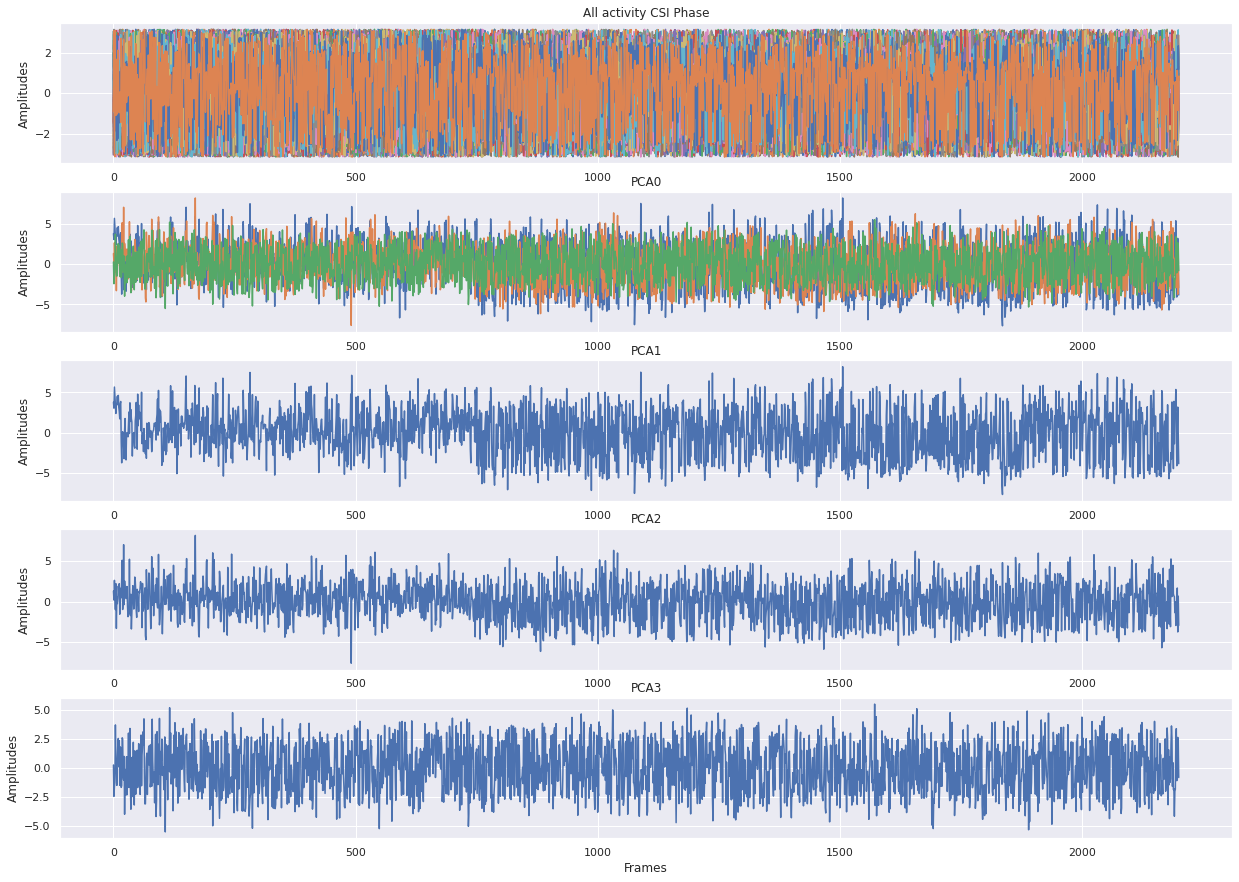

In [15]:


pca = decomposition.PCA(n_components=3)
phase_pca = pca.fit_transform(dataset_phs)

# print(phase_pca.shape)
# print(phase_pca.T[0].shape)

fig = plt.figure(figsize = (21, 15))
ax1 = fig.add_subplot(511)
plt.plot(dataset_phs)
# annotation_line(ax=ax1, text='Walking', xmin=1, xmax=745, y=70, ytext=62, linewidth=1, linecolor='black', fontsize=14)


ax1.set_title("All activity CSI Phase")
ax1.set_ylabel('Amplitudes')

ax1 = plt.subplot(512)
plt.plot(phase_pca)
ax1.set_title("PCA0")
plt.ylabel('Amplitudes')

ax2 = plt.subplot(513)
plt.plot(phase_pca.T[0])
ax2.set_title("PCA1")
plt.ylabel('Amplitudes')

ax3 = plt.subplot(514)
plt.plot(phase_pca.T[1])
ax3.set_title("PCA2")
plt.ylabel('Amplitudes')

ax4 = plt.subplot(515)
plt.plot(phase_pca.T[2])
ax4.set_title("PCA3")
plt.xlabel('Frames')
plt.ylabel('Amplitudes')


plt.show()


## Extract PC1 of amp and Phase to make dataset

In [16]:
amp_df=pd.DataFrame(amp_pca.T[0], columns=["PC1_amp"])
amp_df

PC1_amp
0    -0.723190
1    -0.715935
2    -0.711068
3    -0.709781
4    -0.482959
...        ...
2196 -0.265868
2197  0.825568
2198  0.998762
2199  1.316721
2200 -0.509440

[2201 rows x 1 columns]

In [17]:
phs_df=pd.DataFrame(phase_pca.T[0], columns=["PC1_phs"])
phs_df

PC1_phs
0     3.769868
1     3.047788
2     5.661183
3     4.554888
4     3.575572
...        ...
2196 -4.086880
2197  0.500555
2198  3.180900
2199 -0.044992
2200 -3.832483

[2201 rows x 1 columns]

In [18]:
PCA_amp_phs_df = pd.concat([amp_df, phs_df, df[['Activity']]], axis = 1)
PCA_amp_phs_df

PC1_amp   PC1_phs     Activity
0    -0.723190  3.769868      Walking
1    -0.715935  3.047788      Walking
2    -0.711068  5.661183      Walking
3    -0.709781  4.554888      Walking
4    -0.482959  3.575572      Walking
...        ...       ...          ...
2196 -0.265868 -4.086880  No_Activity
2197  0.825568  0.500555  No_Activity
2198  0.998762  3.180900  No_Activity
2199  1.316721 -0.044992  No_Activity
2200 -0.509440 -3.832483  No_Activity

[2201 rows x 3 columns]

In [19]:
# PCA_amp_phs_df.to_csv("/home/ranjit/python_uhd_install/Dataset_Preparation/PCA_amp_phs.csv")

# DWT for Noise reduction and features extraction

## Required function

In [20]:
def madev(d,axis=None): # Mean absolute deviation of a signal
    return np.mean(np.absolute(d-np.mean(d,axis)),axis)


def wavelet_denoising(x, wavelet='db4', level=6):                                   
    coeff = pywt.wavedec(x, wavelet, mode="symmetric") #symmetric, per, zero, constant, reflect, smooth,
#     print(np.array(coeff)[0].shape)
    sigma = (1/0.6745) * madev(coeff[0][1])
    
    uthresh = sigma * np.sqrt(2 * np.log(len(x)))
    coeff[1:] = (pywt.threshold(i, value=uthresh, mode='soft') for i in coeff[1:])
    return pywt.waverec(coeff, wavelet, mode='symmetric')



def annotation_line( ax, xmin, xmax, y, text, ytext=0, linecolor='black', linewidth=1, fontsize=12 ):

    ax.annotate('', xy=(xmin, y), xytext=(xmax, y), xycoords='data', textcoords='data', annotation_clip=False,
            arrowprops={'arrowstyle': '|-|', 'color':linecolor, 'linewidth':linewidth})
    
    ax.annotate('', xy=(xmin, y), xytext=(xmax, y), xycoords='data', textcoords='data', annotation_clip=False,
            arrowprops={'arrowstyle': '<->', 'color':linecolor, 'linewidth':linewidth})

    xcenter = xmin + (xmax-xmin)/2
    if ytext == 0:
        ytext = y + ( ax.get_ylim()[1] - ax.get_ylim()[0] ) / 20

    ax.annotate(text, xy=(xcenter,ytext), ha='center', va='center', fontsize=fontsize, annotation_clip=False)

    
    
'''
def DWT_noise(vals, th=10):
    threshold = th # Threshold for filtering

    data = vals.copy() 
    # print("data: ", data.shape)

    w = pywt.Wavelet('sym5')
    maxlev = pywt.dwt_max_level(data.shape[1], w.dec_len)
    # print("maximum level is " + str(maxlev))
    
    # Decompose into wavelet components, to the level selected:
    coeffs = pywt.wavedec(data, 'sym5', level=maxlev)
    
    
    #plt.figure()
    for i in range(1, len(coeffs)):
        coeffs[i] = pywt.threshold(coeffs[i], threshold*max(coeffs[i]))
    datarec = pywt.waverec(coeffs, 'sym5')
    return datarec

'''


'\ndef DWT_noise(vals, th=10):\n    threshold = th # Threshold for filtering\n\n    data = vals.copy() \n    # print("data: ", data.shape)\n\n    w = pywt.Wavelet(\'sym5\')\n    maxlev = pywt.dwt_max_level(data.shape[1], w.dec_len)\n    # print("maximum level is " + str(maxlev))\n    \n    # Decompose into wavelet components, to the level selected:\n    coeffs = pywt.wavedec(data, \'sym5\', level=maxlev)\n    \n    \n    #plt.figure()\n    for i in range(1, len(coeffs)):\n        coeffs[i] = pywt.threshold(coeffs[i], threshold*max(coeffs[i]))\n    datarec = pywt.waverec(coeffs, \'sym5\')\n    return datarec\n\n'

In [21]:
fig = plt.figure(figsize = (21, 15))

ax = plt.subplot(211)
plt.plot(dataset_amp)
plt.title("CSI amplitude")
plt.ylabel('Amplitudes')

ax = plt.subplot(212)
amp1_with_dwt = wavelet_denoising(dataset_amp)
plt.plot(amp1_with_dwt)
plt.title("DWT Noise removal")

Text(0.5, 1.0, 'DWT Noise removal')

## Dimensionality Reduction using PCA

### Mathematically the main objective of PCA is to:
1. Find an orthonormal basis for the data.
2. Sort dimensions in the order of importance.
3. Discard the low significance dimensions.
4. Focus on uncorrelated and Gaussian components.

### Steps involved in PCA
1. Standardize the PCA.
2. Calculate the covariance matrix.
3. Find the eigenvalues and eigenvectors for the covariance matrix.
4. Plot the vectors on the scaled data.

## Amplitude Dimensionality Reduction using PCA

##  1. Standardizing the features

In [22]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
std_features_amp = StandardScaler().fit_transform(amp_pca)


In [23]:
# fig = plt.figure(figsize = (21, 7))
# plt.plot(x)

# PCA Projection to 2D

In [24]:
# from sklearn.decomposition import PCA
# pca = PCA(n_components=2)
# principalComponents_amp = pca.fit_transform(std_features_amp)
# principalDf_amp = pd.DataFrame(data = principalComponents_amp
#              , columns = ['PC_amp1', 'PC_amp2'])

# principalDf_amp

## Phase Dimensionality Reduction using PCA

In [25]:
# std_features_phs = StandardScaler().fit_transform(phase_pca)

# # PCA Projection to 2D
# principalComponents_phs = pca.fit_transform(std_features_phs)
# principalDf_phs = pd.DataFrame(data = principalComponents_phs
#              , columns = ['PC_phs1', 'PC_phs2'])

# principalDf_phs

In [26]:
# finalDf = pd.concat([principalDf_amp, principalDf_phs, df[['Activity']]], axis = 1)
# finalDf

In [27]:
# fig = plt.figure(figsize = (8,8))
# ax = fig.add_subplot(1,1,1) 
# ax.set_xlabel('PC1', fontsize = 15)
# ax.set_ylabel('PC2', fontsize = 15)
# ax.set_title('2 component PCA', fontsize = 20)
# Activity = ['Sitting', 'Walking', 'No_Person']
# colors = ['r', 'g', 'b']
# for Activity, color in zip(Activity,colors):
#     indicesToKeep = finalDf['Activity'] == Activity
#     ax.scatter(finalDf.loc[indicesToKeep, 'PC1']
#                , finalDf.loc[indicesToKeep, 'PC2']
#                , c = color
#                , s = 50)
# ax.legend(Activity)
# ax.grid()

# Split the dataset into training (70%) and testing (30%)

In [28]:
CSI_Amp=PCA_amp_phs_df.iloc[:,:-1].values
Activity=PCA_amp_phs_df.iloc[:,-1].values


In [29]:
# Splitting the dataset into training set and test set

from sklearn.model_selection import train_test_split
RANDOM_SEED = 42
X_train,X_test,Y_train,Y_test=train_test_split(CSI_Amp,Activity,test_size=0.20,random_state=RANDOM_SEED)
# X_train, X_test, Y_train, Y_test = train_test_split(reshaped_segments, labels, test_size=0.3, random_state=RANDOM_SEED)


**Features scaling** (optional): in order to improve the performance


In [30]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.transform(X_test)

## K-fold cross validation

In [31]:
from sklearn.model_selection import KFold

k = 10
kf = KFold(n_splits=k , shuffle=True, random_state=42)

# Apply ML Model: 
1. KNN
2. SVM
3. Decision Tree
4. Random Forest
5. XGBoost
6. RNN- LSTM

# 1. KNN

KNN Hyperparameters tuning

In [32]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

weights=['uniform','distance' ]
n_neighbors = list(range(1,3)) # 30
leaf_size = list(range(1,5)) # 50
algorithm=['auto', 'ball_tree'] # , 'kd_tree', 'brute'
p=[1,2]
metric=['minkowski']
KNN_param=dict(weights=weights, n_neighbors=n_neighbors, leaf_size=leaf_size, algorithm=algorithm, p=p, metric=metric)

# metric: str or callable, default=’minkowski’
# metric_params: dict, default=None

model_KNN=KNeighborsClassifier()

clf_KNN=GridSearchCV(model_KNN, KNN_param, cv=kf, return_train_score=False, refit = True) # , verbose = 3

clf_KNN.fit(X_train_scaler,Y_train)



GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree'],
                         'leaf_size': [1, 2, 3, 4], 'metric': ['minkowski'],
                         'n_neighbors': [1, 2], 'p': [1, 2],
                         'weights': ['uniform', 'distance']})

In [33]:
result_KNN=pd.DataFrame(clf_KNN.cv_results_)
result_KNN
result_KNN[['param_algorithm','param_metric','param_n_neighbors','param_weights','mean_test_score','rank_test_score']]

param_algorithm param_metric param_n_neighbors param_weights  \
0             auto    minkowski                 1       uniform   
1             auto    minkowski                 1      distance   
2             auto    minkowski                 1       uniform   
3             auto    minkowski                 1      distance   
4             auto    minkowski                 2       uniform   
..             ...          ...               ...           ...   
59       ball_tree    minkowski                 1      distance   
60       ball_tree    minkowski                 2       uniform   
61       ball_tree    minkowski                 2      distance   
62       ball_tree    minkowski                 2       uniform   
63       ball_tree    minkowski                 2      distance   

    mean_test_score  rank_test_score  
0          0.611364                1  
1          0.611364                1  
2          0.606818               33  
3          0.606818               33  
4          0.601705               57  
..              ...              ...  
59         0.606818               33  
60         0.601705               57  
61         0.611364                1  
62         0.609091               25  
63         0.606818               33  

[64 rows x 6 columns]

In [34]:
acc_KNN=clf_KNN.best_score_*100
print(f"Accuracy with KNN: {acc_KNN} %")

Accuracy with KNN: 61.13636363636363 %


## K - Fold cross validation Score

In [35]:
from sklearn.model_selection import cross_val_score
kf_KNN=cross_val_score(model_KNN,X_train_scaler, Y_train,cv=kf ,scoring='accuracy')

# Score of K-fold cross validation

kf_KNN.mean()

0.6267045454545455

## Accuracy -- KNN

In [36]:
from sklearn.metrics import accuracy_score
Y_pred_KNN=clf_KNN.predict(X_test_scaler)
accuracy_score(Y_test,Y_pred_KNN)


0.5941043083900227

## Confusion Matrix -- KNN 

In [37]:
from sklearn.metrics import confusion_matrix

LABELS = ['Walking','Sitting','No_Person']

confusion_matrix_KNN = confusion_matrix(Y_test, Y_pred_KNN)

plt.figure(figsize=(12, 8))
sns.heatmap(confusion_matrix_KNN, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# 2. Support Vector Machine (SVM)

## Hyper Parameter Tuning -- SVM Classifier

In [38]:
from sklearn.svm import SVC

SVM_param={'C': [0.1, 1, 10, 100, 1000],
           'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
           'kernel':['rbf','linear']
           }

# refit = True, verbose = 3

model_SVM=SVC()

clf_SVM=GridSearchCV(model_SVM, SVM_param, cv=kf, return_train_score=False, refit = True) # , verbose = 3

clf_SVM.fit(X_train_scaler,Y_train)



GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'linear']})

In [39]:
acc_SVM=clf_SVM.best_score_*100
print(f"Accuracy with SVM: {acc_SVM} %")


Accuracy with SVM: 64.26136363636363 %


In [40]:
# dir(clf)

In [41]:
result_SVM=pd.DataFrame(clf_SVM.cv_results_)
# result_SVM
result_SVM[['param_C','param_gamma', 'param_kernel','mean_test_score','rank_test_score']]

param_C param_gamma param_kernel  mean_test_score  rank_test_score
0      0.1           1          rbf         0.628977                5
1      0.1           1       linear         0.619886               15
2      0.1         0.1          rbf         0.617614               41
3      0.1         0.1       linear         0.619886               15
4      0.1        0.01          rbf         0.554545               45
5      0.1        0.01       linear         0.619886               15
6      0.1       0.001          rbf         0.319318               48
7      0.1       0.001       linear         0.619886               15
8      0.1      0.0001          rbf         0.319318               48
9      0.1      0.0001       linear         0.619886               15
10       1           1          rbf         0.622727               12
11       1           1       linear         0.619886               15
12       1         0.1          rbf         0.623295               11
13       1         0.1       linear         0.619886               15
14       1        0.01          rbf         0.613068               43
15       1        0.01       linear         0.619886               15
16       1       0.001          rbf         0.553409               46
17       1       0.001       linear         0.619886               15
18       1      0.0001          rbf         0.319318               48
19       1      0.0001       linear         0.619886               15
20      10           1          rbf         0.620455               14
21      10           1       linear         0.618182               30
22      10         0.1          rbf         0.631250                3
23      10         0.1       linear         0.618182               30
24      10        0.01          rbf         0.623864               10
25      10        0.01       linear         0.618182               30
26      10       0.001          rbf         0.614205               42
27      10       0.001       linear         0.618182               30
28      10      0.0001          rbf         0.552273               47
29      10      0.0001       linear         0.618182               30
30     100           1          rbf         0.627273                8
31     100           1       linear         0.618750               25
32     100         0.1          rbf         0.634091                2
33     100         0.1       linear         0.618750               25
34     100        0.01          rbf         0.628977                5
35     100        0.01       linear         0.618750               25
36     100       0.001          rbf         0.624432                9
37     100       0.001       linear         0.618750               25
38     100      0.0001          rbf         0.611932               44
39     100      0.0001       linear         0.618750               25
40    1000           1          rbf         0.642614                1
41    1000           1       linear         0.618182               30
42    1000         0.1          rbf         0.630682                4
43    1000         0.1       linear         0.618182               30
44    1000        0.01          rbf         0.628977                7
45    1000        0.01       linear         0.618182               30
46    1000       0.001          rbf         0.621023               13
47    1000       0.001       linear         0.618182               30
48    1000      0.0001          rbf         0.618182               30
49    1000      0.0001       linear         0.618182               30

In [42]:

model_SVM=SVC(kernel='rbf',C=1000,gamma=1)
model_SVM.fit(X_train_scaler,Y_train)

Y_pred_SVM=model_SVM.predict(X_test_scaler)
SVM_acc=model_SVM.score(X_test_scaler, Y_test)
print(f"SVM_accuracy: {SVM_acc*100} %")


SVM_accuracy: 64.39909297052154 %


## Score of K-fold cross validation

In [43]:
from sklearn.model_selection import cross_val_score
kf_SVM=cross_val_score(model_SVM, X_train_scaler, Y_train,cv=kf ,scoring='accuracy')

print(f"SVM K-fold cross validation mean Score: {kf_SVM.mean()*100} %")

SVM K-fold cross validation mean Score: 64.26136363636363 %


## Confusion matrix -- SVM

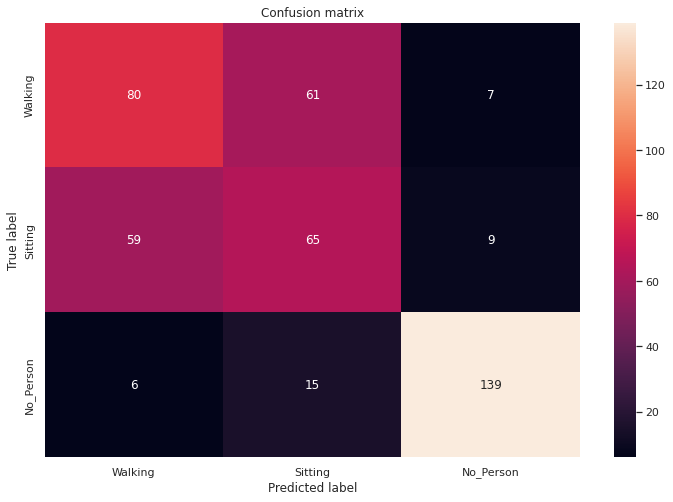

In [44]:

confusion_matrix_SVM = confusion_matrix(Y_test, Y_pred_SVM)

plt.figure(figsize=(12, 8))
sns.heatmap(confusion_matrix_SVM, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");

plt.title("Confusion matrix")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# 3. Decision Tree

In [45]:
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV


DT_param = {"max_depth": [3, None],
            "criterion": ["gini", "entropy"],
            "splitter":['best', 'random'],
            "max_features": ['auto', 'sqrt', 'log2']
              }

# max_depth: int, default=None , min_samples_split: int or float, default=2, min_samples_leaf: int or float, default=1
# max_features: int, float or {“auto”, “sqrt”, “log2”}, default=None

model_DT=DecisionTreeClassifier()

DT_clf = GridSearchCV(model_DT, DT_param, cv = kf ,return_train_score=False, refit = True) # , verbose = 3

DT_clf.fit(X_train_scaler, Y_train)


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, None],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']})

In [46]:
result_DT=pd.DataFrame(DT_clf.cv_results_)
# result_DT
result_DT[['param_criterion','param_splitter','param_max_features','rank_test_score','mean_test_score' ]]

param_criterion param_splitter param_max_features  rank_test_score  \
0             gini           best               auto                1   
1             gini         random               auto               19   
2             gini           best               sqrt                4   
3             gini         random               sqrt               23   
4             gini           best               log2               16   
5             gini         random               log2               24   
6             gini           best               auto               15   
7             gini         random               auto               18   
8             gini           best               sqrt                9   
9             gini         random               sqrt               16   
10            gini           best               log2                8   
11            gini         random               log2                5   
12         entropy           best               auto                6   
13         entropy         random               auto               21   
14         entropy           best               sqrt                3   
15         entropy         random               sqrt               22   
16         entropy           best               log2                2   
17         entropy         random               log2               20   
18         entropy           best               auto                7   
19         entropy         random               auto               13   
20         entropy           best               sqrt               10   
21         entropy         random               sqrt               11   
22         entropy           best               log2               14   
23         entropy         random               log2               12   

    mean_test_score  
0          0.630682  
1          0.575000  
2          0.617614  
3          0.479545  
4          0.584091  
5          0.475000  
6          0.585227  
7          0.581250  
8          0.597727  
9          0.584091  
10         0.598295  
11         0.615909  
12         0.613068  
13         0.504545  
14         0.618750  
15         0.502841  
16         0.619886  
17         0.550000  
18         0.601136  
19         0.589205  
20         0.596591  
21         0.592045  
22         0.585795  
23         0.589773

In [47]:
acc_DT = DT_clf.best_score_*100
print(f"Accuracy with DT: {acc_DT} %")


Accuracy with DT: 63.06818181818181 %


In [48]:
Y_pred_DT=DT_clf.predict(X_test_scaler)
DT_clf.score(X_test_scaler, Y_test)

0.6077097505668935

# 4. Random Forest

In [49]:
from sklearn.ensemble import RandomForestClassifier

model_RF = RandomForestClassifier(n_estimators = 100) 
 
model_RF.fit(X_train, Y_train)
 
y_pred = model_RF.predict(X_test)
 
from sklearn import metrics 
print()

# using metrics module for accuracy calculation
acc_RF= metrics.accuracy_score(Y_test, y_pred)*100



In [50]:
print(f"Accuracy with Random Forest: {acc_RF} %")

Accuracy with Random Forest: 65.3061224489796 %


# 5. XGBoost

## Precision, Recall and F1 score

In [51]:
from sklearn.metrics import precision_score , recall_score, f1_score

# Precision Score

# precision_score(Y_test,Y_pred_SVM)

# 6. Building the RNN model -- LSTM
This model contains 2 fully-connected and 2 LSTM layers (stacked on each other) with 64 units each:

In [102]:
L2_LOSS = 0.0025
LEARNING_RATE = 0.00025
num_hidden_layer = 64
num_time_steps = 10
step = 1

# Training param
num_epochs=1000
BATCH_SIZE = 1024

In [103]:
num_classes = 3
num_features=2

Hyperparameter Tuning

# Data Preprocessing

In [104]:
from scipy import stats
segments = []
labels = []
for i in range(0, len(df) - num_time_steps, step):
    S0 = PCA_amp_phs_df['PC1_amp'].values[i: i + num_time_steps]
    S1 = PCA_amp_phs_df['PC1_phs'].values[i: i + num_time_steps]
#     S2 = finalDf['PC_phs1'].values[i: i + num_time_steps]
#     S3 = finalDf['PC_phs2'].values[i: i + num_time_steps]
    
    
#     S4 = df['S4'].values[i: i + num_time_steps]
#     S5 = df['S5'].values[i: i + num_time_steps]
#     S6 = df['S6'].values[i: i + num_time_steps]
#     S7 = df['S7'].values[i: i + num_time_steps]
#     S8 = df['S8'].values[i: i + num_time_steps]
#     S9 = df['S9'].values[i: i + num_time_steps]
    
    
    
    label = stats.mode(df['Activity'][i: i + num_time_steps])[0][0]
#     segments.append([S0,S1,S2,S3,S4,S5,S6,S7,S8,S9])
    segments.append([S0,S1])

    
    labels.append(label)

In [105]:
# np.array(segments).shape

# Transfering shape of segment

In [106]:
reshaped_segments = np.asarray(segments, dtype= np.float32).reshape(-1, num_time_steps, num_features)


# One-Hot encoding on label (Walking, Sitting, ....)

In [107]:
labels = np.asarray(pd.get_dummies(labels), dtype = np.float32)
# labels
reshaped_segments.shape


(2191, 10, 2)

In [108]:
XR_train, XR_test, YR_train, YR_test = train_test_split(reshaped_segments, labels, test_size=0.3, random_state=RANDOM_SEED)


# XR_train, XR_test, YR_train, YR_test=train_test_split(CSI_Amp,Activity,test_size=0.30,random_state=RANDOM_SEED)


In [109]:
def create_LSTM_model(inputs):
    W = {
        'hidden': tf1.Variable(tf.random_normal([num_features, num_hidden_layer])),
        'output': tf1.Variable(tf.random_normal([num_hidden_layer, num_classes]))
    }
    biases = {
        'hidden': tf1.Variable(tf.random_normal([num_hidden_layer], mean=1.0)),
        'output': tf1.Variable(tf.random_normal([num_classes]))
    }
    
    X = tf.transpose(inputs, [1, 0, 2])
    X = tf.reshape(X, [-1, num_features])
    hidden = tf.nn.relu(tf.matmul(X, W['hidden']) + biases['hidden'])
    hidden = tf.split(hidden, num_time_steps, 0)

    # Stack 2 LSTM layers
    lstm_layers = [tf.compat.v1.nn.rnn_cell.LSTMCell(num_hidden_layer, forget_bias=1.0) for _ in range(2)]
    
    lstm_layers = tf.keras.layers.StackedRNNCells(lstm_layers)


    outputs, _ = tf.compat.v1.nn.static_rnn(lstm_layers, hidden, dtype=tf.float32)

    # Get output for the last time step
    lstm_last_output = outputs[-1]

    return tf.matmul(lstm_last_output, W['output']) + biases['output']


# Creating Placeholders:

In [110]:
tf.compat.v1.reset_default_graph() # To clear default graph

X = tf.placeholder(tf.float32, [None, num_time_steps, num_features], name="input") # X values that must be feed using feed dict
Y = tf.placeholder(tf.float32, [None, num_classes]) # Y values that must be feed using feed dict

In [111]:
pred_Y = create_LSTM_model(X)
pred_softmax = tf.nn.softmax(pred_Y, name="y_")

In [112]:
l2 = L2_LOSS * \
    sum(tf.nn.l2_loss(tf_var) for tf_var in tf.trainable_variables())

loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = pred_Y, labels = Y)) + l2

In [113]:

optimizer = tf.train.AdamOptimizer(learning_rate=LEARNING_RATE).minimize(loss)

correct_pred = tf.equal(tf.argmax(pred_softmax, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, dtype=tf.float32))


# Training

In [114]:
saver = tf.train.Saver()

history = dict(train_loss=[], 
                     train_acc=[], 
                     test_loss=[], 
                     test_acc=[])

sess=tf.InteractiveSession()
sess.run(tf.global_variables_initializer())

train_count = len(XR_train)

for i in range(1, num_epochs + 1):
    for start, end in zip(range(0, train_count, BATCH_SIZE),range(BATCH_SIZE, train_count + 1,BATCH_SIZE)):
        sess.run(optimizer, feed_dict={X: XR_train[start:end],
                                       Y: YR_train[start:end]})

    _, acc_train, loss_train = sess.run([pred_softmax, accuracy, loss], feed_dict={ X: XR_train, Y: YR_train})

    _, acc_test, loss_test = sess.run([pred_softmax, accuracy, loss], feed_dict={ X: XR_test, Y: YR_test})

    history['train_loss'].append(loss_train)
    history['train_acc'].append(acc_train)
    history['test_loss'].append(loss_test)
    history['test_acc'].append(acc_test)

    if i != 1 and i % 100 != 0:
        continue

    print(f'epoch: {i} test accuracy: {acc_test*100}% loss: {loss_test}')
    
predictions, acc_RNN_final, loss_final = sess.run([pred_softmax, accuracy, loss], feed_dict={X: XR_test, Y: YR_test})

print()
# Convert acc in percent
acc_RNN = acc_RNN_final*100
print(f'final results: accuracy: {acc_RNN}% loss: {loss_final}')


epoch: 1 test accuracy: 30.69908916950226% loss: 2.972295045852661
epoch: 100 test accuracy: 70.97264528274536% loss: 1.405431866645813
epoch: 200 test accuracy: 76.44376754760742% loss: 1.2934149503707886
epoch: 300 test accuracy: 80.39513826370239% loss: 1.2291154861450195
epoch: 400 test accuracy: 82.6747715473175% loss: 1.216245174407959
epoch: 500 test accuracy: 82.21884369850159% loss: 1.2512059211730957
epoch: 600 test accuracy: 70.82067131996155% loss: 2.2646291255950928
epoch: 700 test accuracy: 83.13069939613342% loss: 1.2470803260803223
epoch: 800 test accuracy: 82.06686973571777% loss: 1.278339147567749
epoch: 900 test accuracy: 82.21884369850159% loss: 1.299702763557434
epoch: 1000 test accuracy: 82.37082362174988% loss: 1.3155136108398438

final results: accuracy: 82.37082362174988% loss: 1.3155136108398438


In [116]:
import pickle  # implements binary protocols for serializing and de-serializing a Python object structure

# history = pickle.load(open("history.p", "rb"))
# predictions = pickle.load(open("predictions.p", "rb"))


# Evaluation

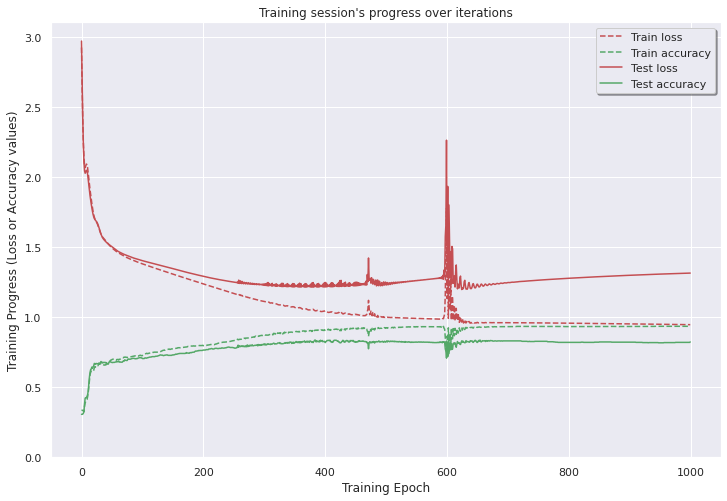

In [117]:
plt.figure(figsize=(12, 8))

plt.plot(np.array(history['train_loss']), "r--", label="Train loss")
plt.plot(np.array(history['train_acc']), "g--", label="Train accuracy")

plt.plot(np.array(history['test_loss']), "r-", label="Test loss")
plt.plot(np.array(history['test_acc']), "g-", label="Test accuracy")

plt.title("Training session's progress over iterations")
plt.legend(loc='upper right', shadow=True)
plt.ylabel('Training Progress (Loss or Accuracy values)')
plt.xlabel('Training Epoch')
plt.ylim(0)

plt.show()

## Confusion matrix

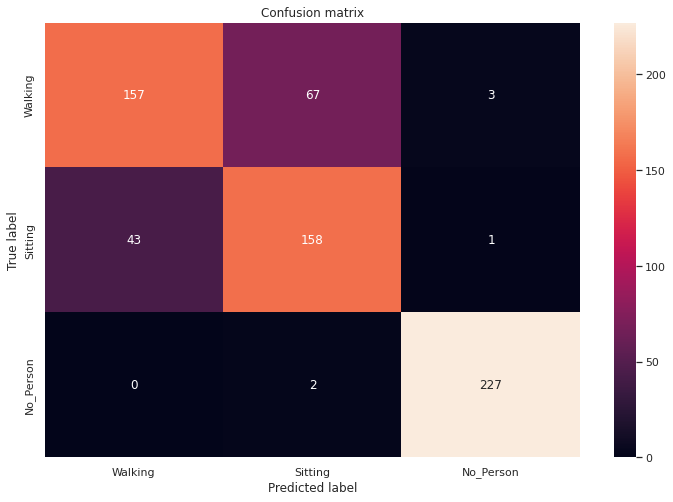

In [118]:
from sklearn.metrics import confusion_matrix

max_test = np.argmax(YR_test, axis=1)
max_predictions = np.argmax(predictions, axis=1)

confusion_matrix = confusion_matrix(max_test, max_predictions)


plt.figure(figsize=(12, 8))
sns.heatmap(confusion_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [119]:
import pandas as pd
import numpy as np
import seaborn as sns
from numpy import array
from numpy import argmax
from keras.layers.core import Dense, Activation, Dropout
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.layers import Flatten


In [120]:
model=Sequential([
    #adding first hidden layer
    Dense(256,activation='relu'),
    #adding second hidden layer
    Dense(128,activation='relu'),
    #adding third hidden layer
    Dense(64,activation='relu'),
    #adding output layer
    Dense(10,activation='softmax')
])

In [86]:
PCA_amp_phs_df

PC1_amp   PC1_phs     Activity
0    -0.723190  3.769868      Walking
1    -0.715935  3.047788      Walking
2    -0.711068  5.661183      Walking
3    -0.709781  4.554888      Walking
4    -0.482959  3.575572      Walking
...        ...       ...          ...
2196 -0.265868 -4.086880  No_Activity
2197  0.825568  0.500555  No_Activity
2198  0.998762  3.180900  No_Activity
2199  1.316721 -0.044992  No_Activity
2200 -0.509440 -3.832483  No_Activity

[2201 rows x 3 columns]

In [101]:
# Import label encoder
from sklearn import preprocessing
 
label_encoder = preprocessing.LabelEncoder()
 PCA_amp_phs_df['Activity']= label_encoder.fit_transform(df['Activity'])
 
# PCA_amp_phs_df['Activity']

In [97]:
XL_train, XL_test, YL_train, YL_test = train_test_split(CSI_Amp, PCA_amp_phs_df['Activity'], test_size=0.3, random_state=RANDOM_SEED)


In [100]:
# YL_train

In [99]:
#compiling the model
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
#fitting the model
model.fit(XL_train, YL_train,epochs=10)

Train on 1540 samples
Epoch 1/10


InvalidArgumentError: ignored

In [ ]:

# model = Sequential()
# model.add(LSTM(hidden_nodes, return_sequences=False, input_shape=(word_vec_length, char_vec_length)))
# model.add(Dropout(0.2))
# model.add(Dense(units=output_labels))
# model.add(Activation('softmax'))
# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

# batch_size=1000
# model.fit(train_x, train_y, batch_size=batch_size, epochs=10, validation_data=(validate_x, validate_y))


# Accuracy for different ML classifier model

In [121]:
print(f"1. Accuracy with K-Nearest Neighbour(KNN): {acc_KNN} % \n")
print(f"2. Accuracy with Support Vector Classifier: {acc_SVM} % \n")
print(f"3. Accuracy with Decision Tree: {acc_DT} % \n")
print(f"4. Accuracy with Random Forest: {acc_RF} % \n")
print(f"5. Accuracy with Recurrent Neural Network(RNN) : {acc_RNN} % \n")


1. Accuracy with K-Nearest Neighbour(KNN): 61.13636363636363 % 

2. Accuracy with Support Vector Classifier: 64.26136363636363 % 

3. Accuracy with Decision Tree: 63.06818181818181 % 

4. Accuracy with Random Forest: 65.3061224489796 % 

5. Accuracy with Recurrent Neural Network(RNN) : 82.37082362174988 % 

